## Linear Regression model using Least square method:-

In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading Data
data = pd.read_csv('Data\headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [70]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
print(type(X))

<class 'numpy.ndarray'>


In [71]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b0==c and b1==m
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficient
print(b1, b0)

0.26342933948939945 325.57342104944223


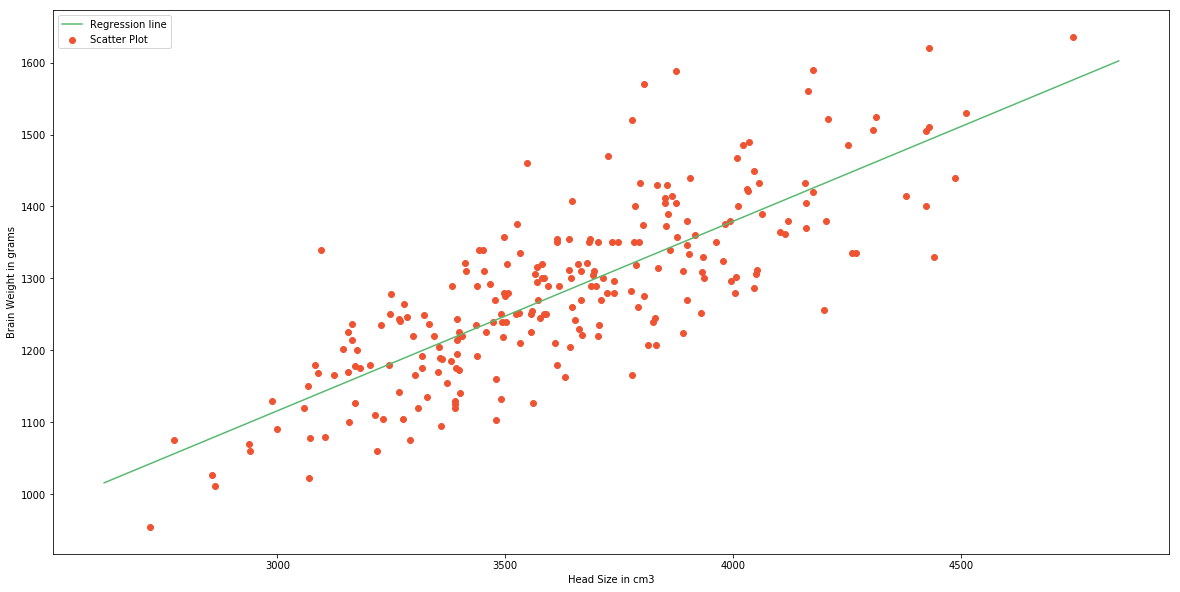

In [72]:
# Plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting line
plt.plot(x, y, c='#58b970', label='Regression line')
# Plotting Scatter points
plt.scatter(X, Y, c='#ef5432', label='Scatter Plot')

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

In [73]:
# To calculate r-squared value
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [74]:
# To calculate r-squared value
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (y_pred - mean_y) ** 2
r2 = (ss_r/ss_t)
print(r2)

0.6393117199570001


## Linear Regression model using sckit learn:-

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Data\headbrain.csv')

# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

m = len(X)

# Cannot use Rank 1 matrix in sckit learn
X = X.reshape((m, 1))
Y = Y.reshape((m, 1))

# Creating model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)

# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957


## Logistic Regression:-

### 1.Titanic Data Analysis:-

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv("Data\\titanic_data\\train.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
print("No. of passengers in original data: ",len(titanic_data.index))

No. of passengers in original data:  891


##### Analyzing Data:-

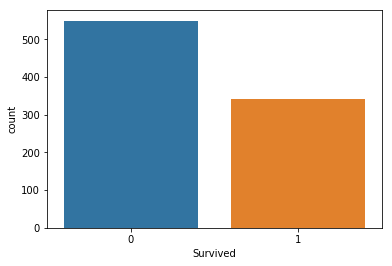

In [78]:
sns.countplot(x="Survived", data=titanic_data)

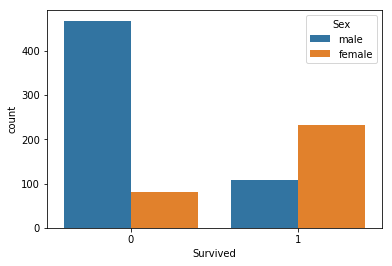

In [79]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

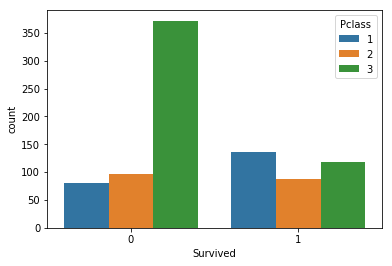

In [80]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

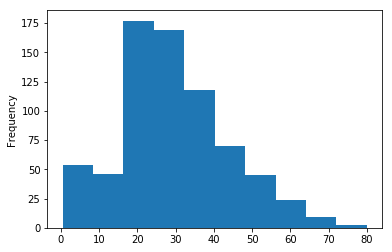

In [81]:
titanic_data["Age"].plot.hist()

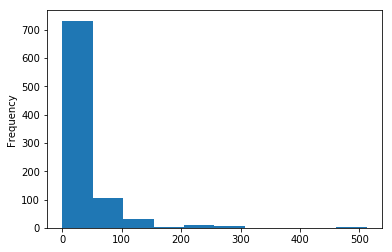

In [82]:
titanic_data["Fare"].plot.hist()

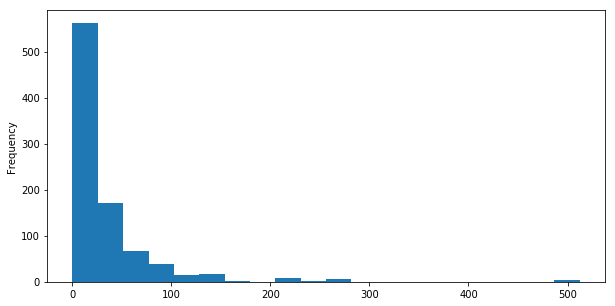

In [83]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10, 5))

In [84]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


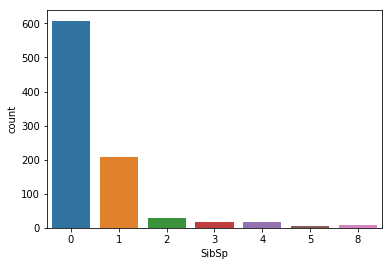

In [85]:
sns.countplot(x="SibSp", data=titanic_data)

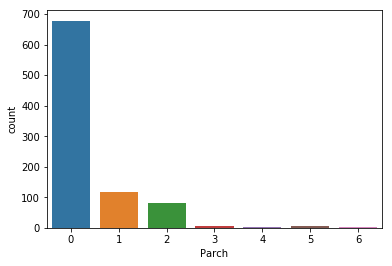

In [86]:
sns.countplot(x="Parch", data=titanic_data)

##### Data Wrangling:-

In [87]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [88]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

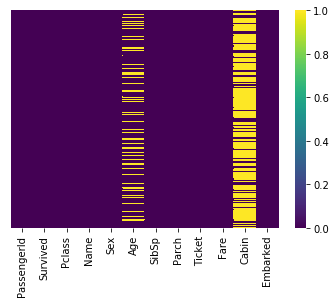

In [89]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

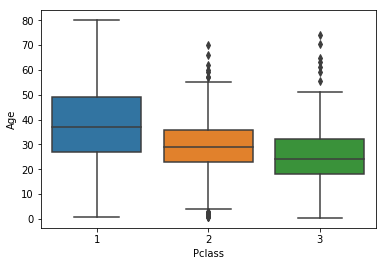

In [90]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [91]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [93]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
titanic_data.dropna(inplace=True)

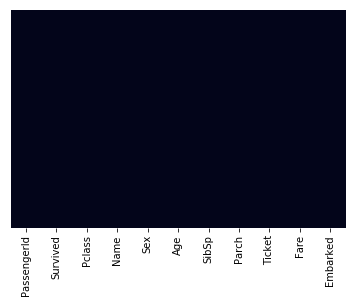

In [95]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [96]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [97]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [98]:
pd.get_dummies(titanic_data["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [99]:
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [100]:
embark = pd.get_dummies(titanic_data["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [101]:
embark = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
Pcl = pd.get_dummies(titanic_data["Pclass"])
Pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [103]:
Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [104]:
titanic_data = pd.concat([titanic_data,sex,embark,Pcl], axis=1)

In [105]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [106]:
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [107]:
titanic_data.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [108]:
titanic_data.shape

(712, 10)

##### Train Data:-

In [109]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
logmodel = LogisticRegression()

In [114]:
logmodel.fit(X_train, y_train)

c:\users\raushan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
help(logmodel.fit)

Help on method fit in module sklearn.linear_model.logistic:

fit(X, y, sample_weight=None) method of sklearn.linear_model.logistic.LogisticRegression instance
    Fit the model according to the given training data.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    
    y : array-like, shape (n_samples,)
        Target vector relative to X.
    
    sample_weight : array-like, shape (n_samples,) optional
        Array of weights that are assigned to individual samples.
        If not provided, then each sample is given unit weight.
    
        .. versionadded:: 0.17
           *sample_weight* support to LogisticRegression.
    
    Returns
    -------
    self : object



In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [62]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.72      0.73        88\n\n   micro avg       0.79      0.79      0.79       214\n   macro avg       0.78      0.77      0.78       214\nweighted avg       0.78      0.79      0.78       214\n'

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test, predictions)

0.7850467289719626

### 2.SUV Data Analysis:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
dataset = pd.read_csv("Data\\SUV_data\\SUV.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.shape

(400, 5)

In [5]:
Gender = pd.get_dummies(dataset["Gender"],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [6]:
dataset = pd.concat([dataset, Gender], axis=1)

In [7]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [8]:
X = dataset.iloc[:,[2,3,5]].values   #all rows and 2&3rd cloumn
y = dataset.iloc[:,4].values

In [9]:
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

c:\users\raushan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\raushan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\raushan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\raushan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

c:\users\raushan\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

89.0

### Decision Tree:-

In [1]:
training_data = [
    ["Green", 3, "Mango"],
    ["Yellow", 3, "Mango"],
    ["Red", 1, "Grape"],
    ["Red", 1, "Grape"],
    ["Yellow", 3, "Lemon"]
]

#column label
# These are used only to print the tree
header = ["color", "diameter", "label"]

In [2]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset"""
    return(set([row[col] for row in rows]))

# Demo:-
# unique_vals(training_data, 0)
# unique_vals(training_data, 1)

In [3]:
def class_count(rows):
    """count the no. of each type of example in a dataset"""
    counts = {}  # a dictionary of label
    for row in rows:
        label = row[-1]
        if(label not in counts):
            counts[label] = 1
        else:
            count[label] += 1
    return(counts)

# Demo:-
# class_count(training_data)

In [4]:
def is_numeric(value):
    """Test if a value is numeric"""
    return(isinstance(value, int) or isinstance(value, float))

# Demo:-
# is_numeric(7)
# is_numeric("Red")

In [6]:
class Question:
    """A Question is used to partition dataset.
    
    This class just record a 'column number' (eg:- 0 for color)
    and a 'column value' (eg:- Green). The 'match' method is used
    to compare the feature value in an example to the feature value
    stored in the Question. See the demo below."""
    
    def __init__(self, column, value):
        self.column = column
        self.value = value
        
    def match(self, example):
        # Compare a feature value in an example to the
        # feature value in this Question
        val = example[self.column]
        if is_numeric(val):
            return(val >= self.value)
        else:
            return(val == self.value)
        
    def __repr__(self):
        """This is just a helper method to print
        the Question in a readable format"""
        condition = "=="
        if(is_numeric(self.value)):
            condition = ">="
        return("Is %s %s %s?" % (
            header[self.column], condition, str(self.value)))
    
    
def partition(rows, question):
    """Partition a dataset.

    For each row in dataset, check if it matches the question.
    If so, add it to 'true rows', otherwise add it to 'false rows'"""

    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return(true_rows, false_rows)
    
# Demo:-
"""
Let's partition the training data based on whether rows are Red.
true_rows, false_rows = partition(training_data, Question(0, Red))
This will contain all the 'Red' rows.
true_rows
This will contain everything else.
false_rows
"""

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    
    There are few different ways to do this, 
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return(impurity)

# Demo:-
"""

"""

def info_gain(left, right, current_uncertainty):
    """Information Gain.
    
    The uncertainity of the starting node, minus the weighted
    impurity of two child nodes.
    """
    
    p = float(len(left)) / (len(left) + len(right))
    return(current_uncertainty - p * gini(left) - (1 - p) * gini(right))

#Demo:-
"""

"""


'\n\n'

### 